In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.oauth2 import service_account
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# Path to your service account JSON file
credentials = service_account.Credentials.from_service_account_file(
    "C:/Users/tanju/Desktop/possible-helix-452922-d1-820af3c2c7c5.json"
)

project_id = "possible-helix-452922-d1"
engine = create_engine(
    f"bigquery://{project_id}",
    credentials_path="C:/Users/tanju/Desktop/possible-helix-452922-d1-820af3c2c7c5.json"
)


In [9]:
query_1 = """
SELECT *
FROM `possible-helix-452922-d1.dbt_tdereli.bike_data_prepped`
LIMIT 10000
"""


df = pd.read_sql(query_1, engine)

In [5]:
query_2 = """
SELECT *
FROM `possible-helix-452922-d1.dbt_tdereli.taxi_data_yellow_prepped`
LIMIT 10000
"""



df_2 = pd.read_sql(query_2, engine)

In [6]:
query_3 = """
SELECT *
FROM `possible-helix-452922-d1.dbt_tdereli.taxi_data_green_prepped`
LIMIT 10000
"""



df_6 = pd.read_sql(query_3, engine)

In [10]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,trip_duration_minutes,trip_duration_minutes_exact
0,213,2015-12-18 07:05:32,2015-12-18 07:09:05,531,Forsyth St & Broome St,40.718939,-73.992663,3019,NYCBS Depot - DEL,40.716633,-73.981933,22175,Subscriber,1980,male,,4,3.5500
1,14923,2016-01-28 19:02:59,2016-01-28 23:11:43,152,Warren St & Church St,40.714740,-74.009106,3019,NYCBS Depot - DEL,40.716633,-73.981933,17692,Subscriber,1986,male,,249,248.7167
2,229405,2015-10-20 06:43:23,2015-10-22 22:26:49,529,W 42 St & 8 Ave,40.757570,-73.990985,3019,NYCBS Depot - DEL,40.716633,-73.981933,19731,Subscriber,1975,male,,3823,3823.4167
3,1402974,2016-01-13 09:41:14,2016-01-29 15:24:09,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3019,NYCBS Depot - DEL,40.716633,-73.981933,14665,Subscriber,1968,female,,23383,23382.9000
4,577,2015-11-08 09:59:17,2015-11-08 10:08:55,311,Norfolk St & Broome St,40.717227,-73.988021,3019,NYCBS Depot - DEL,40.716633,-73.981933,16846,Subscriber,1977,male,,9,9.6167


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   tripduration                 10000 non-null  int64         
 1   starttime                    10000 non-null  datetime64[ns]
 2   stoptime                     10000 non-null  datetime64[ns]
 3   start_station_id             10000 non-null  int64         
 4   start_station_name           10000 non-null  object        
 5   start_station_latitude       10000 non-null  float64       
 6   start_station_longitude      10000 non-null  float64       
 7   end_station_id               10000 non-null  int64         
 8   end_station_name             10000 non-null  object        
 9   end_station_latitude         10000 non-null  float64       
 10  end_station_longitude        10000 non-null  float64       
 11  bikeid                       10000 non-nul

In [12]:
df['bikeid'].duplicated().value_counts()

bikeid
False    7090
True     2910
Name: count, dtype: int64

In [13]:
df_new = df.drop_duplicates(subset='bikeid')

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7090 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   tripduration                 7090 non-null   int64         
 1   starttime                    7090 non-null   datetime64[ns]
 2   stoptime                     7090 non-null   datetime64[ns]
 3   start_station_id             7090 non-null   int64         
 4   start_station_name           7090 non-null   object        
 5   start_station_latitude       7090 non-null   float64       
 6   start_station_longitude      7090 non-null   float64       
 7   end_station_id               7090 non-null   int64         
 8   end_station_name             7090 non-null   object        
 9   end_station_latitude         7090 non-null   float64       
 10  end_station_longitude        7090 non-null   float64       
 11  bikeid                       7090 non-null   int

In [15]:
df_new.describe()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,trip_duration_minutes,trip_duration_minutes_exact
count,7.090000e+03,7090,7090,7090.000000,7090.000000,7090.000000,7090.000000,7090.000000,7090.000000,7090.000000,7090.000000,7090.000000,7090.000000
mean,1.147500e+03,2016-05-18 19:13:31.054836224,2016-05-18 19:32:38.900364288,1028.164739,40.732340,-73.989889,764.229337,40.725546,-73.992261,22078.419464,1976.862764,19.129196,19.124993
min,6.000000e+01,2013-07-01 08:43:33,2013-07-01 08:55:28,72.000000,40.655400,-74.017134,195.000000,40.672968,-74.017134,14529.000000,1885.000000,1.000000,1.000000
25%,3.812500e+02,2015-04-19 21:12:21.500000,2015-04-19 21:19:00,327.000000,40.714740,-74.002777,363.000000,40.708347,-74.010434,17637.250000,1969.000000,6.000000,6.354175
50%,6.370000e+02,2016-07-11 08:52:30.500000,2016-07-11 09:00:26.500000,449.000000,40.732293,-73.990214,403.000000,40.725029,-73.990697,20819.500000,1979.000000,11.000000,10.616700
75%,1.074000e+03,2017-09-18 19:19:08.500000,2017-09-18 19:24:25.500000,535.500000,40.754666,-73.980166,520.000000,40.759923,-73.976485,26144.500000,1986.000000,18.000000,17.900000
max,1.402974e+06,2018-05-31 20:20:51.171000,2018-05-31 20:25:57.403000,3675.000000,40.812056,-73.912555,3663.000000,40.762814,-73.934286,33671.000000,2001.000000,23383.000000,23382.900000
std,1.724259e+04,NaN,NaN,1194.223212,0.027631,0.016294,1010.861692,0.027078,0.017837,5308.163490,11.559432,287.376210,287.376494


In [16]:
df_new.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,trip_duration_minutes,trip_duration_minutes_exact
0,213,2015-12-18 07:05:32,2015-12-18 07:09:05,531,Forsyth St & Broome St,40.718939,-73.992663,3019,NYCBS Depot - DEL,40.716633,-73.981933,22175,Subscriber,1980,male,,4,3.5500
1,14923,2016-01-28 19:02:59,2016-01-28 23:11:43,152,Warren St & Church St,40.714740,-74.009106,3019,NYCBS Depot - DEL,40.716633,-73.981933,17692,Subscriber,1986,male,,249,248.7167
2,229405,2015-10-20 06:43:23,2015-10-22 22:26:49,529,W 42 St & 8 Ave,40.757570,-73.990985,3019,NYCBS Depot - DEL,40.716633,-73.981933,19731,Subscriber,1975,male,,3823,3823.4167
3,1402974,2016-01-13 09:41:14,2016-01-29 15:24:09,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3019,NYCBS Depot - DEL,40.716633,-73.981933,14665,Subscriber,1968,female,,23383,23382.9000
4,577,2015-11-08 09:59:17,2015-11-08 10:08:55,311,Norfolk St & Broome St,40.717227,-73.988021,3019,NYCBS Depot - DEL,40.716633,-73.981933,16846,Subscriber,1977,male,,9,9.6167


In [17]:
df_new.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender', 'customer_plan', 'trip_duration_minutes',
       'trip_duration_minutes_exact'],
      dtype='object')

In [12]:
import plotly.graph_objects as go

# Line traces
lines = []
for _, row in df.iterrows():
    lines.append(
        go.Scattermapbox(
            mode="lines",
            lon=[row['start_station_longitude'], row['end_station_longitude']],
            lat=[row['start_station_latitude'], row['end_station_latitude']],
            line=dict(width=1, color='blue'),
            showlegend=False
        )
    )

# Show bike IDs directly on the map at start station
bikeid_labels = go.Scattermapbox(
    mode="text",
    lon=df_new['start_station_longitude'],
    lat=df_new['start_station_latitude'],
    text=df_new['bikeid'].astype(str),  # Make sure it's a string
    textposition="top right",
    name="Bike IDs",
    showlegend=False
)

# Optional: start and end markers
start_points = go.Scattermapbox(
    mode="markers",
    lon=df_new['start_station_longitude'],
    lat=df_new['start_station_latitude'],
    marker=dict(size=5, color='green'),
    name='Start Stations'
)

end_points = go.Scattermapbox(
    mode="markers",
    lon=df_new['end_station_longitude'],
    lat=df_new['end_station_latitude'],
    marker=dict(size=5, color='red'),
    name='End Stations'
)

# Final figure
fig = go.Figure(data=lines + [start_points, end_points, bikeid_labels])
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=12,
    mapbox_center={
        "lat": df_new['start_station_latitude'].mean(),
        "lon": df_new['start_station_longitude'].mean()
    },
    height=700,
    showlegend=True
)

fig.show()


C:\Users\tanju\AppData\Local\Temp\ipykernel_17624\2268066535.py:7: DeprecationWarning: *scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  go.Scattermapbox(
C:\Users\tanju\AppData\Local\Temp\ipykernel_17624\2268066535.py:17: DeprecationWarning: *scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  bikeid_labels = go.Scattermapbox(
C:\Users\tanju\AppData\Local\Temp\ipykernel_17624\2268066535.py:28: DeprecationWarning: *scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  start_points = go.Scattermapbox(
C:\Users\tanju\AppData\Local\Temp\ipykernel_17624\2268066535.py:36: DeprecationWarning: *scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  end_points = go.Scattermapbox(


In [12]:
df_new['tripduration_minutes'] = df['tripduration']/60

C:\Users\tanju\AppData\Local\Temp\ipykernel_21636\338554674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['tripduration_minutes'] = df['tripduration']/60


In [18]:
df_new['starttime'].min()

Timestamp('2013-07-01 08:43:33')

In [19]:
df_new['starttime'].max()

Timestamp('2018-05-31 20:20:51.171000')

In [20]:
df_new['birth_year'].min()

1885

In [21]:
df_new['birth_year'].isnull().sum()

0

In [22]:
df_new['birth_year'].unique()

array([1980, 1986, 1975, 1968, 1977, 1985, 1960, 1955, 1958, 1956, 1973,
       1972, 1982, 1984, 1990, 1993, 1970, 1969, 1983, 1965, 1991, 1966,
       1963, 1976, 1979, 1961, 1981, 1987, 1989, 1951, 1964, 1967, 1962,
       1974, 1995, 1992, 1957, 1971, 1988, 1947, 1959, 1954, 1978, 1996,
       1953, 1999, 1997, 1994, 1950, 1945, 1946, 1952, 1998, 1948, 1949,
       1885, 1886, 1900, 1941, 1944, 1938, 1943, 1942, 2001, 2000, 1939,
       1935, 1918], dtype=int64)

In [23]:
df_new[df_new['birth_year'] == 1885]

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,trip_duration_minutes,trip_duration_minutes_exact
1206,705,2016-08-30 09:11:03,2016-08-30 09:22:48,455,1 Ave & E 44 St,40.75002,-73.969053,520,W 52 St & 5 Ave,40.759923,-73.976485,25217,Subscriber,1885,unknown,,11,11.75


In [24]:
df_new['year'] = df_new['starttime'].dt.year

In [25]:
df_new.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,trip_duration_minutes,trip_duration_minutes_exact,year
0,213,2015-12-18 07:05:32,2015-12-18 07:09:05,531,Forsyth St & Broome St,40.718939,-73.992663,3019,NYCBS Depot - DEL,40.716633,-73.981933,22175,Subscriber,1980,male,,4,3.5500,2015
1,14923,2016-01-28 19:02:59,2016-01-28 23:11:43,152,Warren St & Church St,40.714740,-74.009106,3019,NYCBS Depot - DEL,40.716633,-73.981933,17692,Subscriber,1986,male,,249,248.7167,2016
2,229405,2015-10-20 06:43:23,2015-10-22 22:26:49,529,W 42 St & 8 Ave,40.757570,-73.990985,3019,NYCBS Depot - DEL,40.716633,-73.981933,19731,Subscriber,1975,male,,3823,3823.4167,2015
3,1402974,2016-01-13 09:41:14,2016-01-29 15:24:09,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3019,NYCBS Depot - DEL,40.716633,-73.981933,14665,Subscriber,1968,female,,23383,23382.9000,2016
4,577,2015-11-08 09:59:17,2015-11-08 10:08:55,311,Norfolk St & Broome St,40.717227,-73.988021,3019,NYCBS Depot - DEL,40.716633,-73.981933,16846,Subscriber,1977,male,,9,9.6167,2015


In [26]:
df_agg = df_new.groupby('year')['trip_duration_minutes_exact'].sum().reset_index()
df_agg

,year,trip_duration_minutes_exact
0,2013,9549.8503
1,2014,12470.1821
2,2015,24965.4997
3,2016,39985.3996
4,2017,34226.0848
5,2018,14399.1856


In [27]:
fig = px.bar(data_frame=df_agg
              , x='year'
              , y='trip_duration_minutes_exact'
              , height=500
              , title="Year vs trip duration"
              #,color='birth_year'
              )
fig.show()

In [28]:
df_agg_2 = df_new.groupby('birth_year')['trip_duration_minutes_exact'].sum().reset_index()
df_agg_2

,birth_year,trip_duration_minutes_exact
0,1885,11.7500
1,1886,12.8167
2,1900,34.2667
3,1918,12.2000
4,1935,3.9000
...,...,...
63,1997,308.8499
64,1998,107.5333
65,1999,96.5334
66,2000,72.2500


In [29]:
fig = px.bar(data_frame=df_agg_2
              , x='birth_year'
              , y='trip_duration_minutes_exact'
              , height=500
              , title="Birth year vs trip duration"
              #,color='birth_year'
              )
fig.show()

In [30]:
df_2.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month,trip_duration_seconds,trip_duration_minutes_exact
0,2,2022-03-03 11:29:14+00:00,2022-03-03 11:29:32+00:00,1.0,0.0,1.0,N,1,0.0,0.0,...,0.0,0.0,0.0,0.0,193,264,2022,3,18,0.3000
1,2,2022-03-21 09:54:56+00:00,2022-03-21 09:55:38+00:00,1.0,0.0,1.0,N,2,0.0,0.0,...,0.0,0.0,0.0,0.0,193,193,2022,3,42,0.7000
2,2,2022-03-24 17:22:46+00:00,2022-03-24 17:23:12+00:00,1.0,0.0,1.0,N,2,0.0,0.0,...,0.0,0.0,0.0,0.0,193,193,2022,3,26,0.4333
3,2,2022-03-28 15:29:05+00:00,2022-03-28 15:30:19+00:00,1.0,0.0,1.0,N,1,0.0,0.0,...,0.0,0.0,0.0,0.0,193,193,2022,3,74,1.2333
4,1,2022-03-19 10:36:38+00:00,2022-03-19 10:36:38+00:00,1.0,0.0,5.0,N,2,0.0,0.0,...,0.0,0.0,0.0,0.0,229,264,2022,3,0,0.0000


In [31]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   vendor_id                    10000 non-null  object             
 1   pickup_datetime              10000 non-null  datetime64[ns, UTC]
 2   dropoff_datetime             10000 non-null  datetime64[ns, UTC]
 3   passenger_count              9726 non-null   float64            
 4   trip_distance                10000 non-null  float64            
 5   rate_code                    9726 non-null   object             
 6   store_and_fwd_flag           9726 non-null   object             
 7   payment_type                 10000 non-null  object             
 8   fare_amount                  10000 non-null  float64            
 9   extra                        10000 non-null  float64            
 10  mta_tax                      10000 non-null  fl

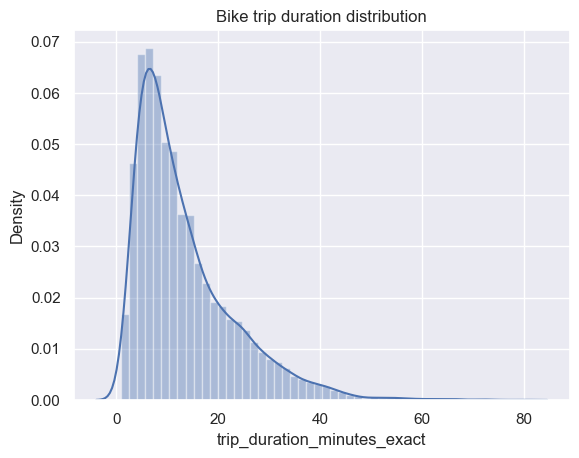

In [32]:
df_4 = df_new[df_new['trip_duration_minutes_exact'] < 80]
sns.distplot(df_4['trip_duration_minutes_exact'])
plt.title('Bike trip duration distribution');

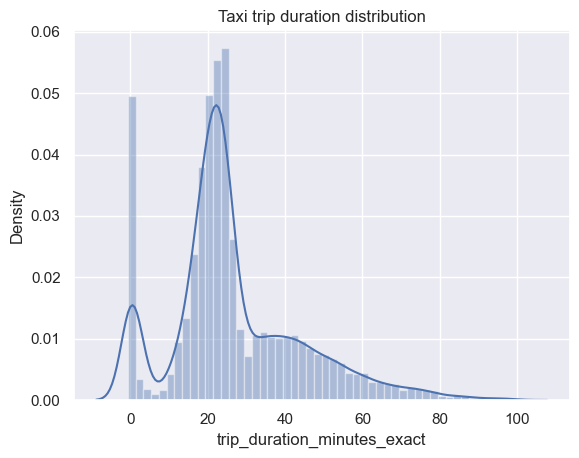

In [33]:
df_3 = df_2[df_2['trip_duration_minutes_exact'] < 100]
sns.distplot(df_3['trip_duration_minutes_exact'])
plt.title('Taxi trip duration distribution');

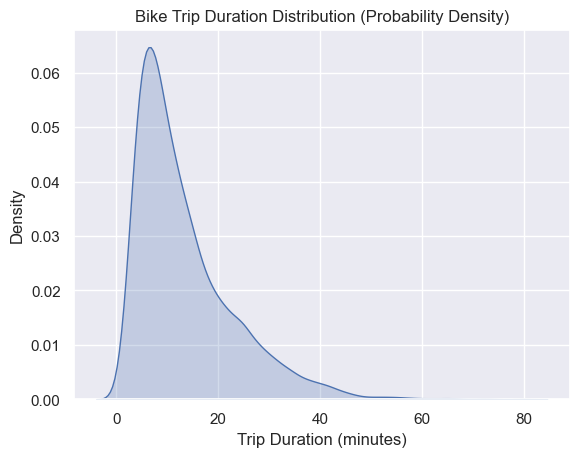

In [34]:
sns.kdeplot(df_4['trip_duration_minutes_exact'], fill=True)
plt.title('Bike Trip Duration Distribution (Probability Density)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Density');


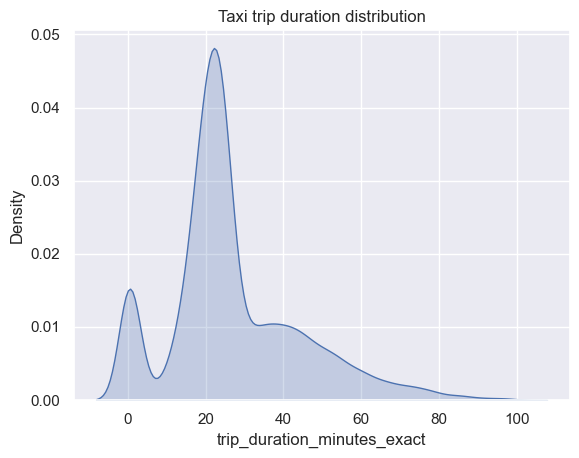

In [35]:
df_3 = df_2[(df_2['trip_duration_minutes_exact'] < 100) & (df_2['trip_duration_minutes_exact'] > 0)]
sns.kdeplot(df_3['trip_duration_minutes_exact'] , fill=True)
plt.title('Taxi trip duration distribution');

In [37]:
df_6.head()

,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_code,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,distance_between_service,time_between_service,trip_type,imp_surcharge,pickup_location_id,dropoff_location_id,data_file_year,data_file_month,trip_duration_seconds,trip_duration_minutes_exact
0,1,2022-01-05 07:59:53+00:00,2022-01-05 07:59:56+00:00,N,1.0,1.0,0.0,0.0,0.0,0.0,...,None,None,1.0,0.0,74,74,2022,1,3,0.0500
1,1,2022-01-06 16:51:39+00:00,2022-01-06 16:52:18+00:00,N,5.0,0.0,0.0,0.0,0.0,0.0,...,None,None,2.0,0.0,82,82,2022,1,39,0.6500
2,1,2022-01-14 21:23:25+00:00,2022-01-14 21:24:21+00:00,N,5.0,0.0,0.8,0.0,0.0,0.0,...,None,None,2.0,0.0,82,82,2022,1,56,0.9333
3,1,2022-01-19 13:48:10+00:00,2022-01-19 13:48:43+00:00,N,1.0,1.0,0.0,0.0,0.0,0.0,...,None,None,1.0,0.0,236,75,2022,1,33,0.5500
4,1,2022-01-21 12:31:18+00:00,2022-01-21 12:32:01+00:00,N,1.0,1.0,0.0,0.0,0.0,0.0,...,None,None,1.0,0.0,145,145,2022,1,43,0.7167


In [39]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   vendor_id                    10000 non-null  object             
 1   pickup_datetime              10000 non-null  datetime64[ns, UTC]
 2   dropoff_datetime             10000 non-null  datetime64[ns, UTC]
 3   store_and_fwd_flag           1966 non-null   object             
 4   rate_code                    1966 non-null   object             
 5   passenger_count              1966 non-null   float64            
 6   trip_distance                10000 non-null  float64            
 7   fare_amount                  10000 non-null  float64            
 8   extra                        10000 non-null  float64            
 9   mta_tax                      10000 non-null  float64            
 10  tip_amount                   10000 non-null  fl

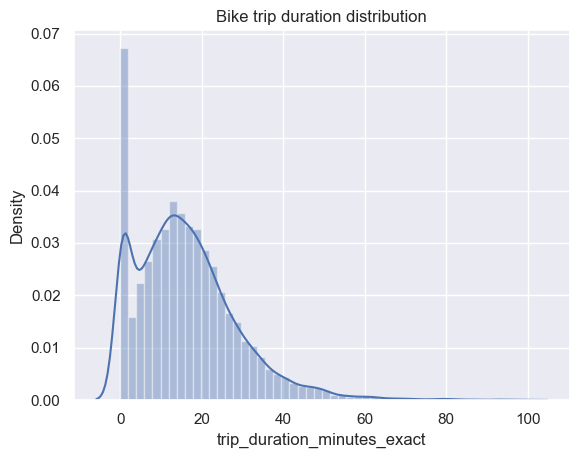

In [42]:
df_7 = df_6[(df_6['trip_duration_minutes_exact'] < 100) & (df_2['trip_duration_minutes_exact'] > 0)]
sns.distplot(df_7['trip_duration_minutes_exact'])
plt.title('Bike trip duration distribution');

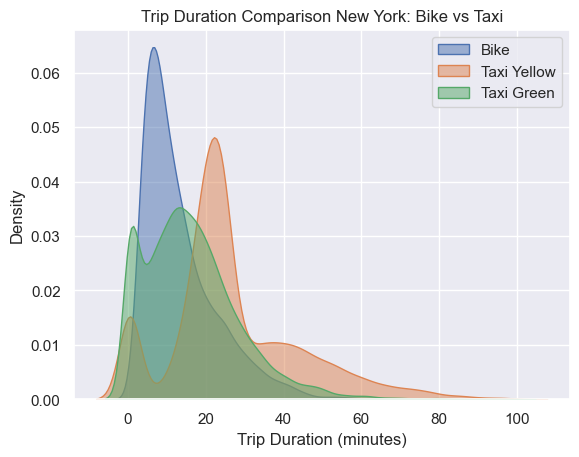

In [44]:
sns.kdeplot(df_4['trip_duration_minutes_exact'], fill=True, label='Bike', alpha=0.5)
sns.kdeplot(df_3['trip_duration_minutes_exact'], fill=True, label='Taxi Yellow', alpha=0.5)
sns.kdeplot(df_7['trip_duration_minutes_exact'], fill=True, label='Taxi Green', alpha=0.5)

plt.title('Trip Duration Comparison New York: Bike vs Taxi')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()